In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
LKparams = np.array([[0.97867689, 0.40612422],
       [0.73892489, 0.38885002],
       [0.80447378, 0.40348282],
       [0.64264364, 0.4129186 ],
       [0.66413235, 0.44255803],
       [0.87676586, 0.49210149],
       [1.08596796, 0.52452348],
       [1.23243495, 0.53665515],
       [1.58590096, 0.5608825 ],
       [2.08502651, 0.59801618],
       [2.3226688 , 0.60467329]])

# cond cutoff 100, gradient cutoff 1e-5
FSparams_loose = np.array([[5.80200798, 0.62348484],
 [7.40977222, 0.67756233],
 [7.453949  , 0.6957459 ],
 [5.85091536, 0.65018788],
 [4.60132385, 0.63456327],
 [4.55511205, 0.67643774],
 [5.33933707, 0.72290557],
 [6.20683927, 0.7489752 ],
 [7.41741088, 0.78316624],
 [8.12447712, 0.80010563],
 [8.70822659, 0.81620346]])

# cond cutoff 100, gradient cutoff 1e-4
FSparams_tight = np.array([[3.99696437, 0.60115734],
       [4.32641709, 0.63828529],
       [4.59970119, 0.71239452],
       [3.99257113, 0.71552029],
       [3.9315006 , 0.73467338],
       [4.5674312 , 0.79315019],
       [5.07726186, 0.79983146],
       [5.72412255, 0.81096243],
       [6.75218297, 0.82503089],
       [7.60707337, 0.85143377],
       [8.31609976, 0.86289857]])

alphasdeg = np.linspace(40,-60,11)

Text(0, 0.5, 'param value')

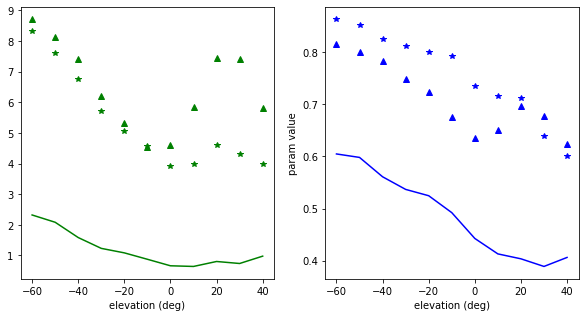

In [3]:
paramlabels = ['sigma','beta']
paramcolors = ['g','b']
plt.figure(figsize=(10,5),facecolor='w')
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(alphasdeg,LKparams[:,i],'-',color=paramcolors[i],label='LK '+paramlabels[i])
    plt.plot(alphasdeg,FSparams_loose[:,i],'^',color=paramcolors[i],label='FS loose '+paramlabels[i])
    plt.plot(alphasdeg,FSparams_tight[:,i],'*',color=paramcolors[i],label='FS tight'+paramlabels[i])
    plt.xlabel('elevation (deg)')
plt.ylabel('param value')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


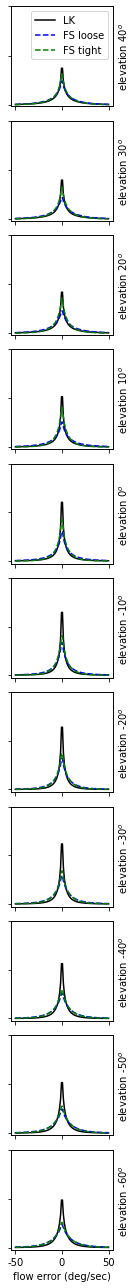

In [4]:
# show generalized Gaussian model
from scipy.special import gamma
def prob(x,params):
    sigma,beta = params
    return beta/(2*sigma*gamma(1/beta)) * np.exp(-np.abs(x/sigma)**beta)

x = np.linspace(-50,50,100)

plt.figure(figsize=(2,18),facecolor='w')  

for a in range(len(alphasdeg)):
    ax1 = plt.subplot(len(alphasdeg),1,a+1)
    plt.plot(x,prob(x,LKparams[a]),'k',label='LK')
    plt.plot(x,prob(x,FSparams_loose[a]),'--b',label='FS loose')
    plt.plot(x,prob(x,FSparams_tight[a]),'--g',label='FS tight')
    plt.xticks([-50,0,50],[])
    plt.yticks([0,.1,.2],[])
    if a == 0:
        plt.legend()
    if a == len(alphasdeg)-1:
        plt.xticks([-50,0,50],[-50,0,50])
        plt.xlabel('flow error (deg/sec)')
    ax2 = ax1.twinx()
    plt.ylabel(f'elevation {alphasdeg[a]:.0f}$^o$')
    plt.yticks([])
    plt.ylim(0,0.2)
    
plt.tight_layout()


os.makedirs('./final_plots/',exist_ok=True)
plt.savefig(f'./final_plots/final_distributions_all.png', format='png',dpi=300)
plt.savefig(f'./final_plots/final_distributions_all.eps', format='eps',dpi=300)